In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from random import choices
from matplotlib import pyplot as plt

[Chosen items], Profit] Weight
[[4, 0, 1, 6], 7050000] 10.0
[[6, 1, 5], 7700000] 9.0
[[6, 5, 4], 9050000] 9.5
[[5, 6, 4], 9050000] 9.5
[[6, 5, 4], 9050000] 9.5
[[4, 5, 6], 9050000] 9.5
[[5, 6, 4], 9050000] 9.5
[[6, 5, 4], 9050000] 9.5
[[6, 5, 4], 9050000] 9.5
[[6, 5, 4], 9050000] 9.5
[[5, 6, 4], 9050000] 9.5
[[4, 5, 6], 9050000] 9.5
[[5, 6, 4], 9050000] 9.5
[[6, 4, 5], 9050000] 9.5
[[6, 4, 5], 9050000] 9.5
[[5, 4, 6], 9050000] 9.5
[[5, 6, 4], 9050000] 9.5
[[6, 4, 5], 9050000] 9.5
[[5, 6, 4], 9050000] 9.5
[[5, 4, 6], 9050000] 9.5
[[6, 4, 5], 9050000] 9.5
[[4, 5, 6], 9050000] 9.5
[[5, 4, 6], 9050000] 9.5
[[4, 5, 6], 9050000] 9.5
[[6, 5, 4], 9050000] 9.5
[[5, 6, 4], 9050000] 9.5
[[4, 6, 5], 9050000] 9.5
[[5, 6, 4], 9050000] 9.5
[[5, 6, 4], 9050000] 9.5
[[5, 6, 4], 9050000] 9.5


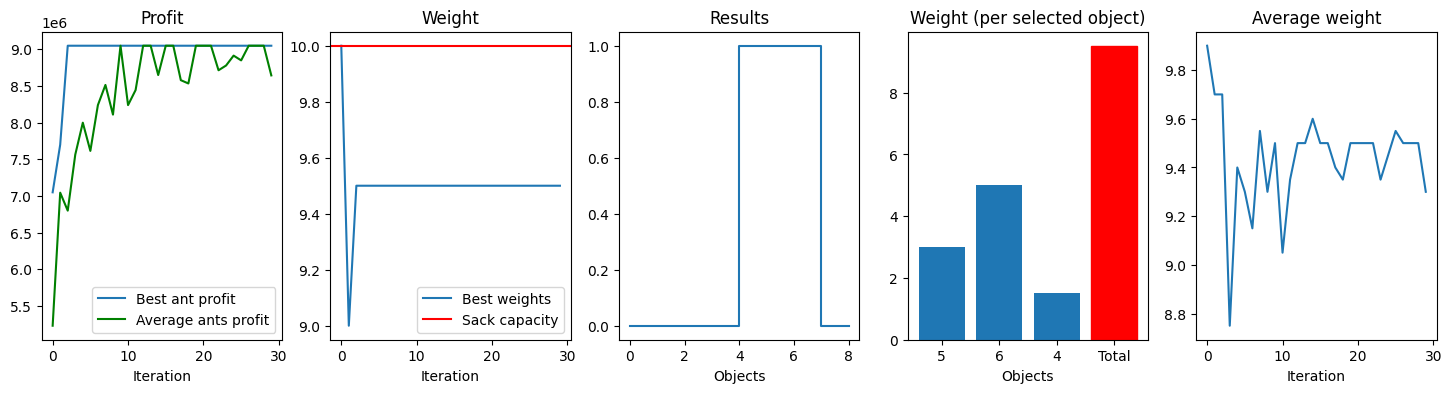

In [16]:
def readFile():
    dataset = pd.read_csv("[profit-weight].csv", header = None) 
    return dataset

def setProfit(dataset):
    profit = dataset[[0]].to_numpy() #Convert profit column to numpy array
    new_list = list(profit.flatten()) # Convert numpy array to python list
    return new_list

def setWeight(dataset):
    weight = dataset[[1]].to_numpy() #Convert weight column to numpy array
    new_list = list(weight.flatten()) # Convert numpy array to python list
    return new_list

def heuristic_info(weight, profit, capacity):
    #return profit/(weight/capacity) 
    #return profit/(weight**2)
    return capacity / weight

def probability_selector(available_solutions, probabilities):
    selected_item = choices(available_solutions, probabilities) #Select an item of the list based on the probabilities
    return selected_item[0]

def main():

    ######INITIALIZATION###

    #Create a dataframe
    dataset = readFile()
    #Set Weight list
    weight = setWeight(dataset)
    #Set profits list
    profit = setProfit(dataset)
    sack_capacity = 10

    alpha = 1 #probability
    beta = 0.02 #probability
    ro = 0.05 #evaporation rate
    ant_count = 10 #ant population
    iterations = 30 #epochs

    pheromone_track = 0.1 * np.ones(len(weight)) #initialize pheromone for all the objects
    best_ant = [[0], 0] #best values (indexObject-totalBenefit) at moment
    best_ants= [[], []] #best values (indexObject-totalBenefit) of all the execution
    global_best_ant = [[0], 0] #best global values (indexObject-totalBenefit) 
    avg_ants=[] #average benefits of all iterations
    graph=[] #best benefits for iteration
    weight_graph = [] #total weight for iteration
    average_ants_graph = [] #average benefits for iterations
    average_weight =[] #avergae weight for iteration
    
    print("[Chosen items], Profit] Weight")
          
    for iter in range(iterations):
        ants = [[],[]] #saves the objects and benefits if this iteration
        for ant_num in range(ant_count): 
            availability = [True] * len(weight) #initialize a list with disponibility of the objects (all true at the first)
            S = [] #list of selected objects for ant
            profit_1 = 0 #accumulated profit for ant 
            capacity = sack_capacity # initialize available capacity

            while(capacity>=0): #as long as there is space
                chosen_obj = []
                for item in range(len(weight)): #for every item
                    if (availability[item] == True): #if it is available
                        chosen_obj.append(((pheromone_track[item])**alpha) * ((heuristic_info(weight[item], profit[item], sack_capacity)) ** beta)) # value calculated pheromone power alpha and heuristic informacion power beta
              
                    else:
                        chosen_obj.append(0)

                chosen_objects_sum = np.sum(chosen_obj) #sum the weight of taked items
                
                p_j = []
                for item in range(len(weight)):
                    p_j.append(chosen_obj[item] / chosen_objects_sum) #transition probability

                o_j = probability_selector(weight, p_j) #Select a object based on probalities
                taken_object_idx = weight.index(o_j) #obtain index of taken object
                S.append(taken_object_idx) #insert taken object on selected objects  
                availability[taken_object_idx] = False #set unavailable taken object

                capacity -= weight[taken_object_idx] #reducing available capacity
                profit_1 += profit[taken_object_idx] #plus profit

                for x in range(0,len(availability)): #optimize algorithm, if an item of the rest of the list is heavier than the available capacity, then set it like unavailable
                    if weight[x] > capacity:
                        availability[x] = False

                if not any(availability): break #if there are no more available, break the loop

            ants[0].append(S) #saving objects selected of ant iteration
            ants[1].append(profit_1) #saving profit of ant iteration
            avg_ants = sum(ants[1])/len(ants[1]) #average of profit until current iteration

            if ants[1][ant_num] >= ants[1][int(np.argmax(ants[1]))]: #if actual ant is better than the best at this ant iteration then update best 
                best_ant[0], best_ant[1] = ants[0][ant_num], ants[1][ant_num] #updating objects and profit
            else:
                pass 

        
        #plot 5 information (average weight)
        suma1 = 0
        cont = -1
        for i in range(len(ants[0])):
            cont = cont + 1
            for j in ants[0][cont]:
                suma1 = suma1 + weight[j] #sum weight of every ant
        average = suma1 / ant_count #calculate average por iteration
        average_weight.append(average) #save average
            

        best_ants[0].append(best_ant[0]) #save results of general iteration(objects)
        best_ants[1].append(best_ant[1]) #save results of general iteration(profit)
        average_ants_graph.append(avg_ants)

        if best_ants[1][iter] >= best_ants[1][int(np.argmax(best_ants[1]))]: #if actual general iteration is better than the best at this iteration then update best 
            global_best_ant[0], global_best_ant[1] = best_ants[0][iter], best_ants[1][iter] #updating objects and profit
        else:
            pass

        delta_tau = np.zeros(len(profit)) #calculating delta_tau (amount of pheromone to add)
        for n in global_best_ant[0]:
            delta_tau[n] = 1 / (1 + ((max(profit) - profit[n]) / max(profit)) )

        pheromone_track *= 1-ro #evaporate pheromone
        pheromone_track += delta_tau #adding pheromone

        weight_selected_items = np.sum([weight[n] for n in global_best_ant[0]]) #total weight of selcted objects of global best
        print(global_best_ant, weight_selected_items) 
        graph.append(global_best_ant[1]) #save global per iteration 
        weight_graph.append(weight_selected_items) # plot of best weights

    fig, axs = plt.subplots(1, 5, figsize=(18, 4))

    #Information plot 1
    axs[0].plot(graph, label='Best ant profit')
    axs[0].plot(average_ants_graph, label='Average ants profit', color='green')
    axs[0].legend(loc="lower right")
    axs[0].set_title('Profit')
    axs[0].set_xlabel('Iteration')
    
    #Information plot 2

    axs[1].plot(weight_graph,  label="Best weights")
    axs[1].axhline(y=sack_capacity, label="Sack capacity", color='r', linestyle='-')
    axs[1].legend(loc="lower right")
    axs[1].set_title('Weight')
    axs[1].set_xlabel('Iteration')

    #Information plot 3

    selected_items = global_best_ant[0]
    t = np.arange(0,selected_items[0]+4)
    x = np.zeros_like(t)
    x[global_best_ant[0]] = 1
    axs[2].step(t,x, where="post")
    axs[2].set_title("Results")
    axs[2].set_xlabel('Objects')
    
        #Information plot 4
    aux = []
    suma = 0
    for object in global_best_ant[0]:
        aux.append(weight[object])
        suma = suma + weight[object]
    aux.append(suma)
    
    aux_2 = []
    suma = 0
    for object in global_best_ant[0]:
        aux_2.append(str(object))
    aux_2.append('Total')
    plot = axs[3].bar(aux_2, aux)
    plot[len(aux_2) - 1].set_color('r')
    axs[3].set_title('Weight (per selected object)')
    axs[3].set_xlabel('Objects')

    #Information plot 5
    axs[4].plot(average_weight,  label="Average weights per iteration")
    axs[4].set_xlabel('Iteration')
    axs[4].set_title('Average weight') 
    plt.show()


if __name__ == '__main__':
    main()